In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Documents\python notebooks\Bank_Marketing_Original_Data.csv")

In [74]:
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,contact,Day,Month,Duration,Campaign,Pdays,Previous,poutcome,TARGET
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [75]:
df.head

<bound method NDFrame.head of        Age           Job   Marital  Education Default  Balance Housing Loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  Day

In [76]:
# Check structure
df.info()

# Check nulls
print(df.isnull().sum())

# Check for "unknown" values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col} - 'unknown' count: {(df[col] == 'unknown').sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  int64 
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   Education  45211 non-null  object
 4   Default    45211 non-null  object
 5   Balance    45211 non-null  int64 
 6   Housing    45211 non-null  object
 7   Loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   Day        45211 non-null  int64 
 10  Month      45211 non-null  object
 11  Duration   45211 non-null  int64 
 12  Campaign   45211 non-null  int64 
 13  Pdays      45211 non-null  int64 
 14  Previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  TARGET     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing  

In [77]:
print(df["TARGET"].value_counts(normalize=True) * 100)
print(df["Education"].value_counts(normalize=True) * 100)
print(df["Marital"].value_counts(normalize=True)*100)

TARGET
no     88.30152
yes    11.69848
Name: proportion, dtype: float64
Education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64
Marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64


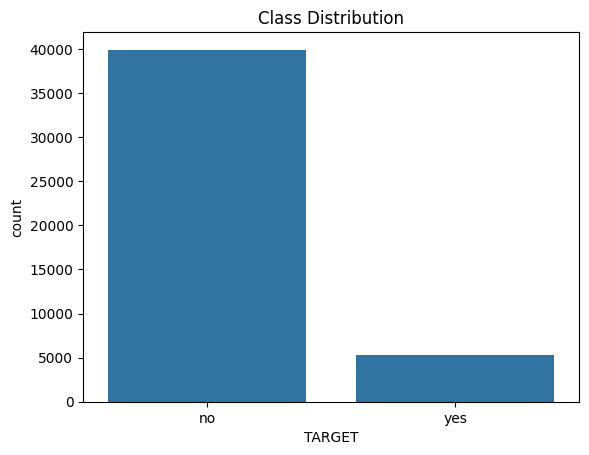

In [78]:
sns.countplot(data=df, x="TARGET")
plt.title("Class Distribution")
plt.show()

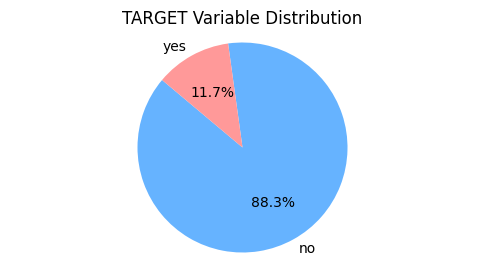

In [79]:
import matplotlib.pyplot as plt

# Get value counts
target_counts = df['TARGET'].value_counts()

# Pie chart

plt.figure(figsize=(6, 3))
plt.pie(target_counts, 
        labels=target_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66b3ff', '#ff9999'])

plt.title("TARGET Variable Distribution")
plt.axis('equal')  # Keeps the pie chart circular
plt.show()



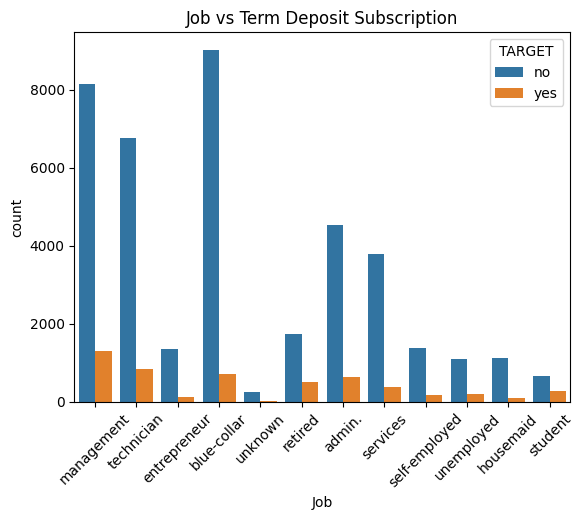

In [80]:
sns.countplot(data=df, x="Job", hue="TARGET")
plt.xticks(rotation=45)
plt.title("Job vs Term Deposit Subscription")
plt.show()


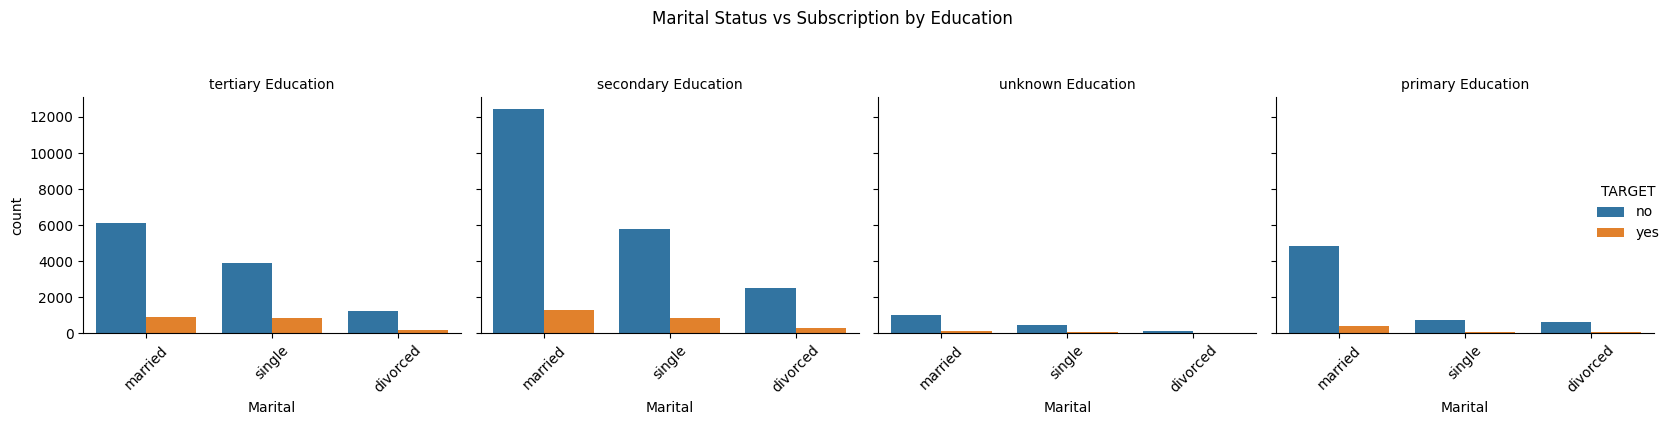

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create FacetGrid: One plot per education level
g = sns.catplot(
    data=df,
    x="Marital",
    hue="TARGET",
    col="Education",
    kind="count",
    height=4,
    aspect=1
)

g.set_xticklabels(rotation=45)
g.set_titles("{col_name} Education")
g.fig.suptitle("Marital Status vs Subscription by Education", y=1.05)
plt.tight_layout()
plt.show()



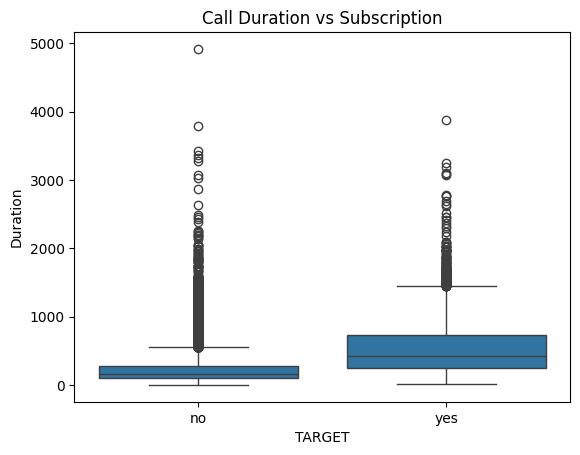

In [94]:
sns.boxplot(data=df, x="TARGET", y="Duration")
plt.title("Call Duration vs Subscription")
plt.show()


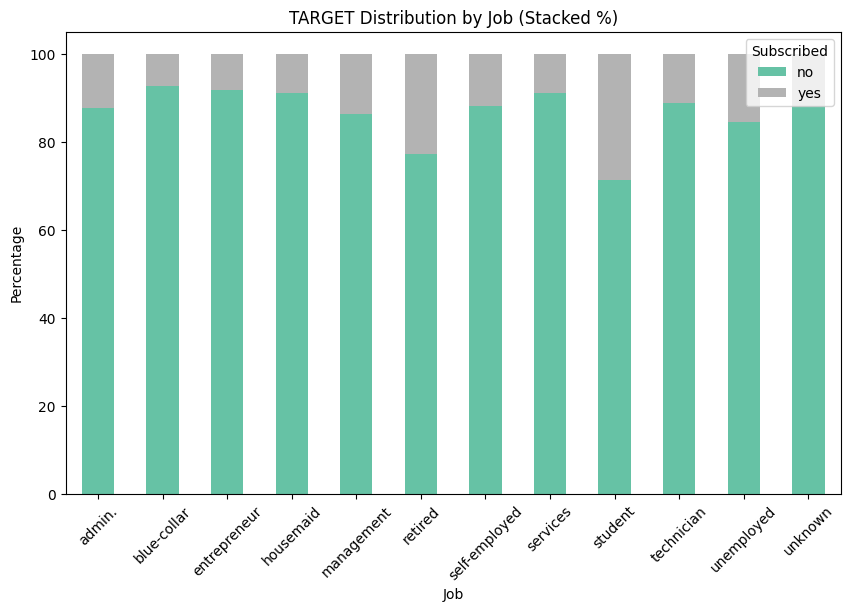

In [82]:
job_target = pd.crosstab(df['Job'], df['TARGET'], normalize='index') * 100
job_target.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.ylabel('Percentage')
plt.title('TARGET Distribution by Job (Stacked %)')
plt.legend(title='Subscribed')
plt.xticks(rotation=45)
plt.show()


In [83]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [84]:
# Define features and target
X = df_encoded.drop("TARGET_yes", axis=1)
y = df_encoded["TARGET_yes"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialize and train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability of class 1 ("yes")

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


Accuracy: 0.91
F1 Score: 0.49
AUC: 0.92


In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train model on resampled data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Predict on the untouched test set
y_pred_smote = rf_smote.predict(X_test)
y_proba_smote = rf_smote.predict_proba(X_test)[:, 1]

# Evaluate
print("Improved F1:", f1_score(y_test, y_pred_smote))
print("Improved AUC:", roc_auc_score(y_test, y_proba_smote))


Improved F1: 0.5334247514569763
Improved AUC: 0.9208740981651505


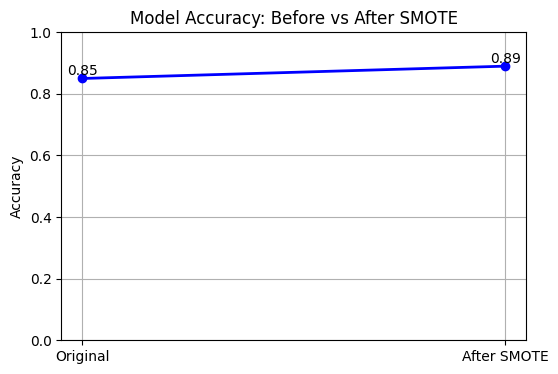

In [87]:
import matplotlib.pyplot as plt

# Example accuracy values (replace with your actual results)
old_accuracy = 0.85  # Before SMOTE
new_accuracy = 0.89  # After SMOTE

# Labels and values
labels = ['Original', 'After SMOTE']
accuracies = [old_accuracy, new_accuracy]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('Model Accuracy: Before vs After SMOTE')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.grid(True)

# Annotate points
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')

plt.show()
